In [1]:
# Import Dependencies
%matplotlib inline

# Standard import 
import math, time, random, datetime
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import catboost
from catboost import CatBoostClassifier, Pool, cv

#import warnings
#warnings.filterwarnings('ignore')

# Loading the data

In [2]:
# Import the predownloaded data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
# Take a first look at the train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Take a first look at the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Explore the data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Description
* survival - Survival - 0 = No, 1 = Yes 
* pclass - Ticket class - 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower) 
* sex - Sex 
* Age - Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
* sibsp - # of siblings / spouses aboard the Titanic	
* parch - # of parents / children aboard the Titanic	
* ticket - Ticket number	
* fare - Passenger fare	
* cabin - Cabin number	
* embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Missing Values

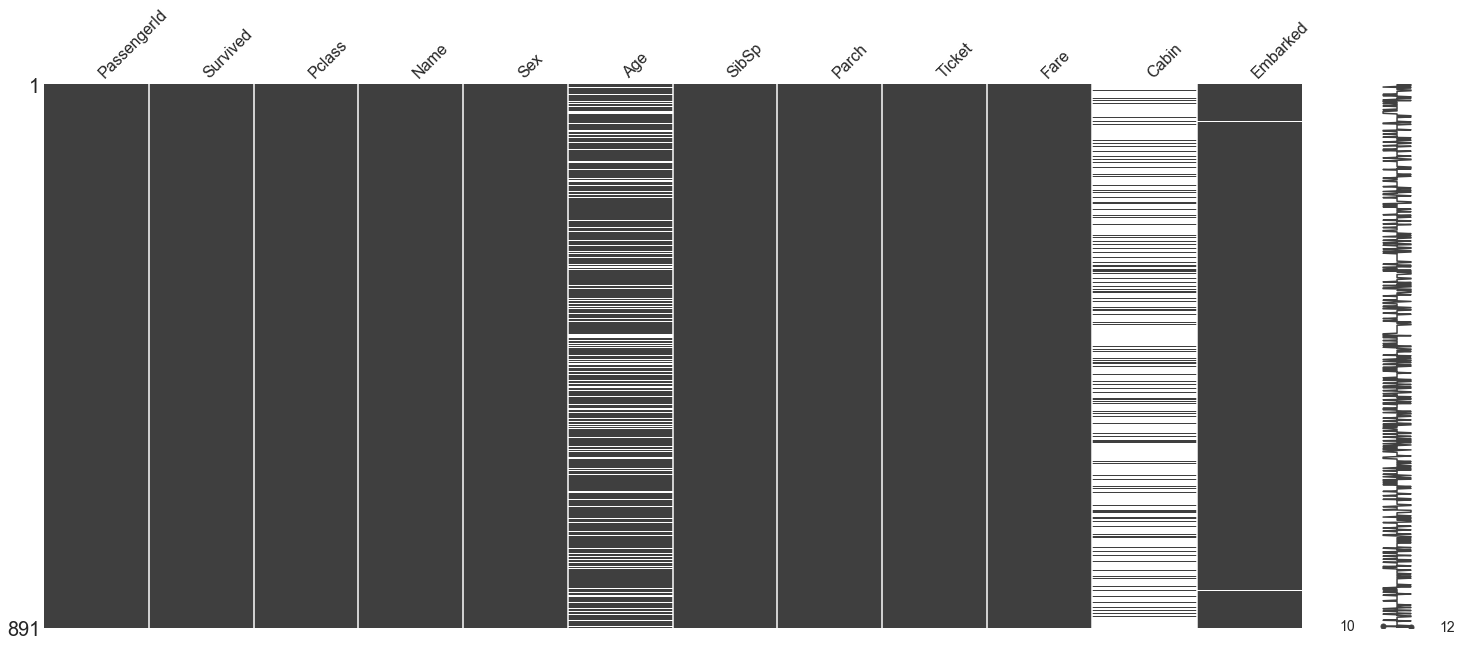

In [7]:
# Create a matrix of missing values. Gray space - values, white space - missings.
missingno.matrix(train)

There are a lot of missing values in variables: CABIN, AGE.  
Also a few missing values in variable EMBARKED.   

In [8]:
missing_values = {}
def count_missings(df):
    """
    Count and print amount of missing values in each variable. Prints if > 0.
    ::param_df:: - Data Frame
    """
    for column in df.columns:
        vals_in_col = df[column].value_counts().sum()
        total_vals = len(df)
        missings = total_vals - vals_in_col
        missing_values[column] = missings
        if missings > 0:
            print ("Missings in %s: %d"%(str(column),int(missings)))

count_missings(train)

Missings in Age: 177
Missings in Cabin: 687
Missings in Embarked: 2


# EXPLORATORY DATA ANALYSIS

In [9]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

# Feature: Survived (Target)
Key: 0 = did not survive, 1 = survived

Missing values in SURVIVED:
0
Values in SURIVED:
0    549
1    342
Name: Survived, dtype: int64


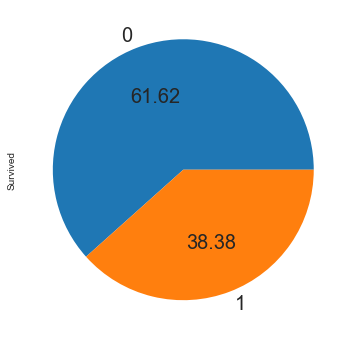

In [10]:
# Count missings
print("Missing values in SURVIVED:")
print(missing_values["Survived"])

# Count values
print("Values in SURIVED:")
print(train["Survived"].value_counts())

# Plot the distribution of the variable
train["Survived"].value_counts().plot.pie(autopct="%.2f", fontsize=20, figsize=(6,6))

In [11]:
# Add the featre for the next analysis
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

# Feature: Pclass
Description: The ticket class of the passenger.  
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

Missing values in PCLASS:
0
Values in PCLASS:
3    491
1    216
2    184
Name: Pclass, dtype: int64


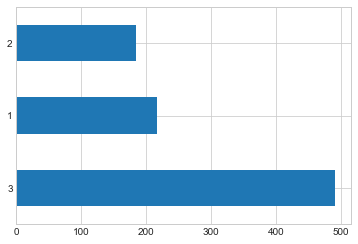

In [12]:
# Count missings
print("Missing values in PCLASS:")
print(missing_values["Pclass"])

# Count values
print("Values in PCLASS:")
print(train["Pclass"].value_counts())

# Plot the distribution of values
train["Pclass"].value_counts().plot.barh()

Currently the variable is numerical, which makes no sense.  
Transformation into categorical is required.

In [13]:
# Store for the analysis
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

# Feature: Name
Description: The name of the passenger.

In [14]:
# Count missings
print("Missing values in NAME:")
print(missing_values["Name"])
print("==================================")
# Count values
print("Values in Name:")
print(train["Name"].value_counts())

Missing values in NAME:
0
Values in Name:
Futrelle, Mrs. Jacques Heath (Lily May Peel)                           1
White, Mr. Percival Wayland                                            1
Goodwin, Master. Harold Victor                                         1
Mellors, Mr. William John                                              1
Oreskovic, Mr. Luka                                                    1
Gheorgheff, Mr. Stanio                                                 1
Nasser, Mrs. Nicholas (Adele Achem)                                    1
Ford, Mr. William Neal                                                 1
Mineff, Mr. Ivan                                                       1
Collyer, Mrs. Harvey (Charlotte Annie Tate)                            1
Bonnell, Miss. Elizabeth                                               1
Cunningham, Mr. Alfred Fleming                                         1
Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")    1
Foreman, 

#### To do:
- extract titles "Mr." / "Miss." etc, to use them as a new categorical variable
- extract name lenght as a new numerical variable (Idea: longer names belongs to upper class people). Check correlation with PCLASS
  
Current usage is impossible

# Feature: Sex
Description: The sex of the passenger (male or female).

Missing values in SEX:
0
Values in Sex:
male      577
female    314
Name: Sex, dtype: int64


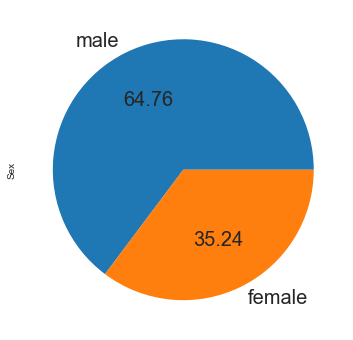

In [15]:
# Count missings
print("Missing values in SEX:")
print(missing_values["Sex"])

# Count values
print("Values in Sex:")
print(train["Sex"].value_counts())

# Plot the distribution of the variable
train["Sex"].value_counts().plot.pie(autopct="%.2f", fontsize=20, figsize=(6,6))

In [16]:
# Store for the analysis
df_bin['Sex'] = train['Sex']
df_bin.loc[df_bin["Sex"]=="male", "Sex"] = 0 # Change all "male" to 0
df_bin.loc[df_bin["Sex"]=="female", "Sex"] = 1 # Change all "female" to 1
print(df_bin.head())

df_con['Sex'] = train['Sex']
print(df_con.head())

   Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0
   Survived  Pclass     Sex
0         0       3    male
1         1       1  female
2         1       3  female
3         1       1  female
4         0       3    male


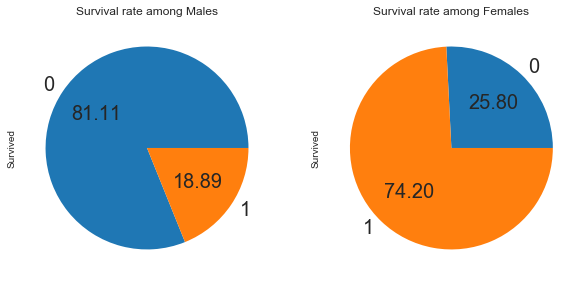

In [17]:
# Check survival rate among males 
fgr = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
df_bin.loc[df_bin["Sex"]==0,"Survived"].value_counts(sort=False).plot(kind="pie", autopct="%.2f", fontsize=20, title="Survival rate among Males")
plt.subplot(1, 2, 2)
# Check survival rate among females 
df_bin.loc[df_bin["Sex"]==1,"Survived"].value_counts(sort=False).plot(kind="pie", autopct="%.2f", fontsize=20, title="Survival rate among Females")

In [18]:
# Check correlation between sex and survival rate
df_bin[["Survived","Sex"]].corr()

,Survived,Sex
Survived,1.000000,0.543351
Sex,0.543351,1.000000


# Feature: Age
Description: The age of the passenger.

In [19]:
# Count missings
print("Missing values in Age:")
print(missing_values["Age"])

Missing values in Age:
177


A lot of missings in the variable.
#### TODO:
- Check the dependency between a title (Mrs, Mr, etc) and AGE
- Build a regression model to fill the missings in AGE

### Function to create count and distribution visualisations

In [20]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

# Feature: SibSp
Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [21]:
# Count missings
print("Missing values in SibSp:")
print(missing_values["SibSp"])

# Count values
print("Values in SibSp:")
print(train["SibSp"].value_counts())

Missing values in SibSp:
0
Values in SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [22]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

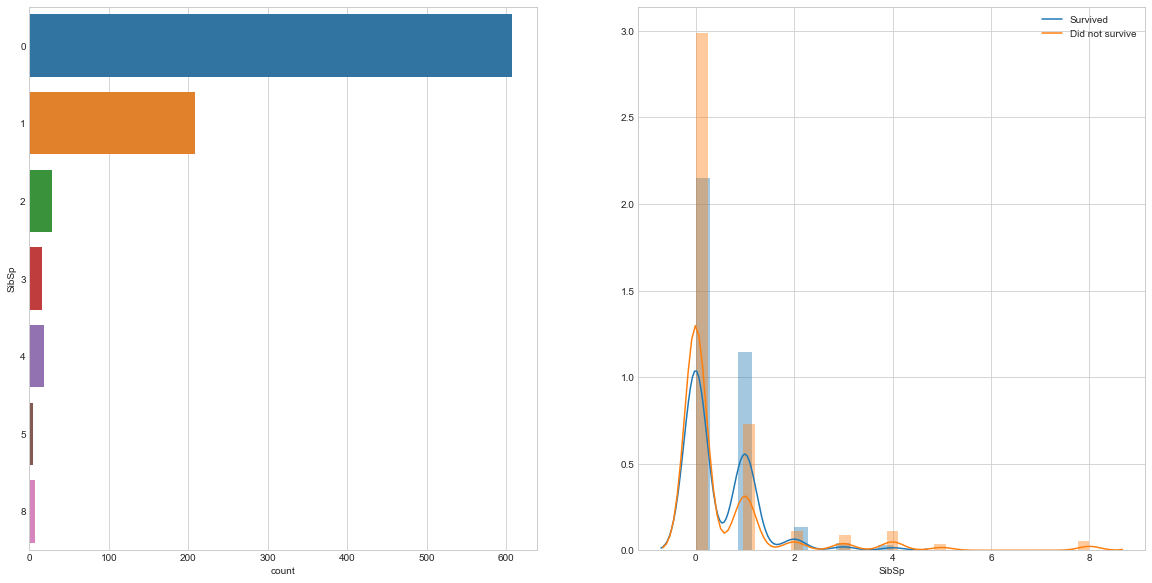

In [23]:
# Visualise the counts of SibSp and the distribution of the values against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

# Feature: Parch
Description: The number of parents/children the passenger has aboard the Titanic.

In [24]:
# Count missings
print("Missing values in Parch:")
print(missing_values["Parch"])

# Count values
print("Values in Parch:")
print(train["Parch"].value_counts())

Missing values in Parch:
0
Values in Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [25]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

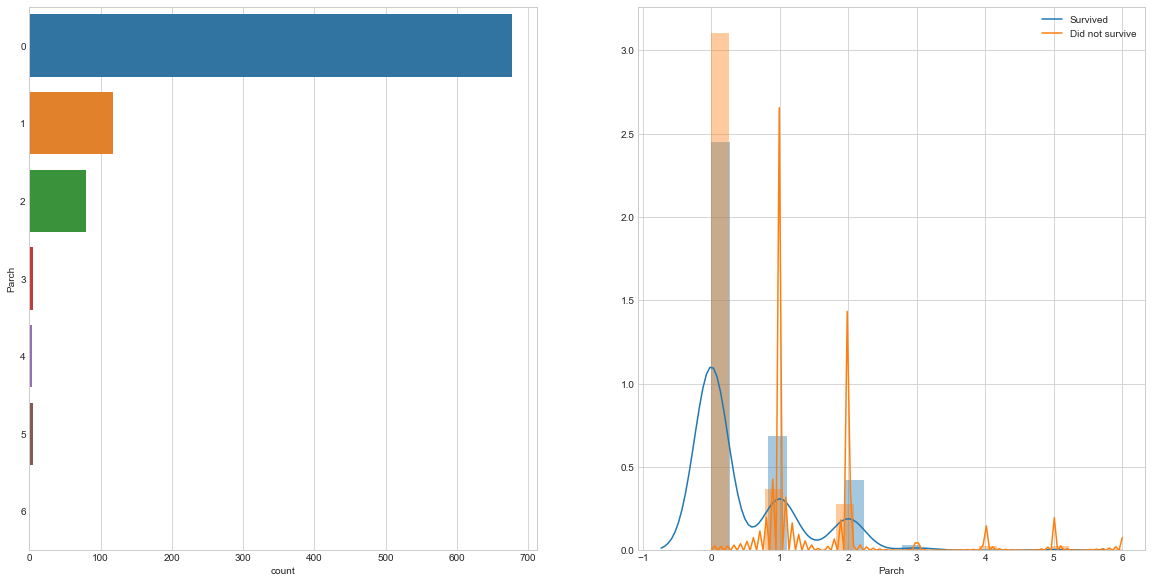

In [26]:
# Visualise the counts of Parch and the distribution of the values against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

# Feature: Ticket
Description: The ticket number of the boarding passenger.

In [27]:
# Count missings
print("Missing values in Ticket:")
print(missing_values["Ticket"])

# Count values
print("Values in Ticket:")
print(train["Ticket"].value_counts())

Missing values in Ticket:
0
Values in Ticket:
1601                  7
347082                7
CA. 2343              7
CA 2144               6
3101295               6
347088                6
S.O.C. 14879          5
382652                5
347077                4
W./C. 6608            4
19950                 4
2666                  4
17421                 4
LINE                  4
113781                4
113760                4
349909                4
4133                  4
PC 17757              4
PC 17572              3
SC/Paris 2123         3
347742                3
24160                 3
13502                 3
C.A. 34651            3
PC 17760              3
35273                 3
110152                3
363291                3
29106                 3
                     ..
323951                1
A.5. 11206            1
W./C. 6609            1
248747                1
26707                 1
347060                1
315097                1
2629                  1
347064            

#### To do:
- find any patterns in tickets to reduce the dimensionality

Current usage is impossible

# Feature: Fare
Description: How much the ticket cost.

In [28]:
# Count missings
print("Missing values in Fare:")
print(missing_values["Fare"])

# Count values
print("Values in Fare:")
print(train["Fare"].value_counts())

Missing values in Fare:
0
Values in Fare:
8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64


In [29]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [30]:
# Check th bins
df_bin['Fare'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

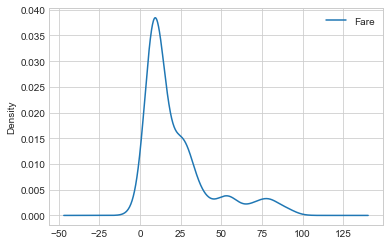

In [31]:
# Check the destribution in the biggest bin
train.loc[train['Fare']<=102.466,["Fare"]].plot.kde()

#### To do:
- Find better bins

# Feature: Cabin
Description: The cabin number where the passenger was staying.

In [32]:
# Count missings
print("Missing values in Cabin:")
print(missing_values["Cabin"])

# Count values
print("Values in Cabin:")
print(train["Cabin"].value_counts())

Missing values in Cabin:
687
Values in Cabin:
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
D              3
E101           3
F2             3
C22 C26        3
E67            2
B49            2
B22            2
C123           2
D33            2
C92            2
B28            2
D35            2
C52            2
D36            2
E121           2
D26            2
C124           2
B5             2
C78            2
C126           2
B18            2
E25            2
E24            2
F G73          2
E44            2
E8             2
              ..
A16            1
B79            1
E77            1
C54            1
E36            1
D11            1
C101           1
B50            1
A5             1
D9             1
E50            1
B101           1
E63            1
A6             1
C103           1
B82 B84        1
C95            1
E58            1
D37            1
C111           1
B73            1
B19            1
B69            1
C118           1
D19            1
A2

#### To do:
- Are there any dependencies between Cabin and Ticket?

# Feature: Embarked
Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

Missing values in Embarked:
2
Values in Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


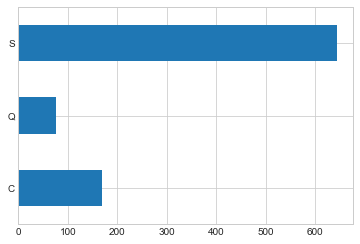

In [33]:
# Plot the distribution of values
train["Embarked"].value_counts(sort=False).plot.barh()

# Count missings
print("Missing values in Embarked:")
print(missing_values["Embarked"])

# Count values
print("Values in Embarked:")
print(train["Embarked"].value_counts())

In [34]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

# Remove Embarked rows which are missing values
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])

### Check the Data Frames for the future analysis

In [35]:
df_bin

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S
5,0,3,0,0,0,"(-0.512, 102.466]",Q
6,0,1,0,0,0,"(-0.512, 102.466]",S
7,0,3,0,3,1,"(-0.512, 102.466]",S
8,1,3,1,0,2,"(-0.512, 102.466]",S
9,1,2,1,1,0,"(-0.512, 102.466]",C


In [36]:
df_con

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C
